<a href="https://colab.research.google.com/github/kyanite153/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

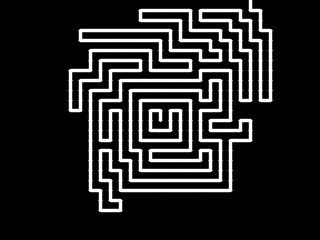

In [162]:
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

h = 240
w = 320

a = 10
color = (255,255,255)

p = np.array([w//2, h//2])

img1 = np.full((h, w, 3), 0, np.uint8)

move_list = np.array([[0,a],[a,0],[0,-a],[-a,0]])
direction = 1
mode = 1
count = 0
max_count = random.randint(5,20)
log = {(p[0],p[1]):direction}
back = -1
going = True

while going==True:
  for i, x in enumerate([mode, 0, -mode]):
    new_direction = (direction + x) % 4
    move = move_list[new_direction]
    new_p = p + move
    if (new_p[0],new_p[1]) in list(log.keys()):
      if i == 2:
        p = np.array(list(log.keys())[back])
        back -= 1
        print(back)
        break
      else:
        continue
    cv2.line(img1, p, p+move, color=color, thickness=2, lineType=16)
    p = new_p
    direction = new_direction
    log[(p[0],p[1])] = direction
    back = -1
    count += 1
    if count >= max_count:
      mode *= -1
      count = 0
      max_count = abs(max_count-30)+random.randint(0,5)
    break
  if not ((a <= p[0] <= w) and (a <= p[1] <= h)):
    break

cv2_imshow(img1)

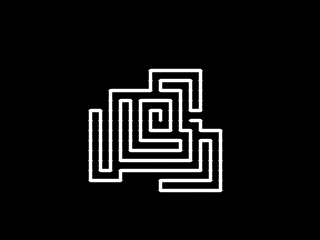

In [156]:
cv2_imshow(img1)

In [157]:
p

array(190)